In [1]:
import os
import pandas as pd

path = os.path.join('data','distritos_propuesto_act.xlsx')
distritos = pd.read_excel(path)
distritos

,Proyecto de Ley,provincia,departamento,distrito_propuesto
0,00448/2016-CR,LUYA,AMAZONAS,CHOCTA
1,00445/2016-CR,RODRIGUEZ DE MENDOZA,AMAZONAS,EL LAUREL
2,00446/2016-CR,UTCUBAMBA,AMAZONAS,EL RON
3,00846/2021-CR,UTCUBAMBA,AMAZONAS,JOSE OLAYA
4,07645/2020-CR,UTCUBAMBA,AMAZONAS,JOSE OLAYA
...,...,...,...,...
641,07982/2020-CR,SAN ROMAN,PUNO,LA CAPILLA
642,07982/2020-CR,SAN ROMAN,PUNO,TAPARACHI
643,08033/2020-CR,SAN ROMAN,PUNO,CERCADO DE JULIACA
644,08033/2020-CR,SAN ROMAN,PUNO,LA CAPILLA


In [2]:
distritos=distritos.set_index('Proyecto de Ley')
duplicados = distritos.duplicated(keep=False)
f_duplicadas = distritos[duplicados]
distritos=distritos.drop_duplicates()
distritos

,provincia,departamento,distrito_propuesto
Proyecto de Ley,,,
00448/2016-CR,LUYA,AMAZONAS,CHOCTA
00445/2016-CR,RODRIGUEZ DE MENDOZA,AMAZONAS,EL LAUREL
00446/2016-CR,UTCUBAMBA,AMAZONAS,EL RON
00846/2021-CR,UTCUBAMBA,AMAZONAS,JOSE OLAYA
06572/2020-CR,RODRIGUEZ DE MENDOZA,AMAZONAS,LAUREL
...,...,...,...
07481/2020-CR,SAN ROMAN,PUNO,CERCADO DE JULIACA
07481/2020-CR,SAN ROMAN,PUNO,TAPARACHI
07195/2020-CR,PACASMAYO,LA LIBERTAD,LIMONCARRO


In [3]:
distritos= distritos.groupby(['departamento', 'provincia'])['distrito_propuesto']. count().reset_index()
distritos

,departamento,provincia,distrito_propuesto
0,AMAZONAS,BAGUA,1
1,AMAZONAS,CONDORCANQUI,2
2,AMAZONAS,LUYA,1
3,AMAZONAS,RODRIGUEZ DE MENDOZA,2
4,AMAZONAS,UTCUBAMBA,3
...,...,...,...
107,SAN MARTIN,TOCACHE,3
108,TACNA,TACNA,3
109,TUMBES,TUMBES,2
110,UCAYALI,ATALAYA,2


In [4]:
distritos.nlargest(10,'distrito_propuesto')

,departamento,provincia,distrito_propuesto
20,AYACUCHO,HUANTA,16
43,CUSCO,LA CONVENCION,15
49,HUANCAVELICA,TAYACAJA,14
14,APURIMAC,ANDAHUAYLAS,13
15,APURIMAC,CHINCHEROS,13
21,AYACUCHO,LA MAR,12
19,AYACUCHO,HUAMANGA,10
54,HUANUCO,HUANUCO,10
16,APURIMAC,COTABAMBAS,7
13,APURIMAC,ABANCAY,6


In [5]:
distritos= distritos.rename(columns={'departamento': 'DEPARTAMEN', 'provincia':'PROVINCIA'})
distritos["PROVINCIA"] = distritos["PROVINCIA"].str.strip()

In [6]:
distritos[['distrito_propuesto']]=distritos[['distrito_propuesto']]. apply(pd.to_numeric)

In [7]:
import geopandas as gpd
import os

Peru=gpd.read_file(os.path.join("mapas", "peruMaps.gpkg"), layer='prov')
Peru["PROVINCIA"] = Peru["PROVINCIA"].str.strip()
Peru

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140..."
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904..."
...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


In [8]:
theMap=Peru.merge(distritos, on=["DEPARTAMEN", "PROVINCIA"], how="outer")
theMap

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,distrito_propuesto
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",NaN
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",1.0
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",NaN
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",2.0
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",1.0
...,...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",NaN
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",NaN
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",2.0
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",4.0


In [9]:
#cambiar los NAN por 0
columnas_a_actualizar = ["distrito_propuesto"]
theMap[columnas_a_actualizar] = theMap[columnas_a_actualizar].fillna(0)
theMap

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,distrito_propuesto
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",0.0
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",1.0
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",0.0
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",2.0
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",1.0
...,...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",0.0
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",0.0
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",2.0
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",4.0


In [10]:
#Data Scaling
columnsToScale=['distrito_propuesto'] # you can add more columns

from sklearn import preprocessing

minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))

minmaxResult = minmaxSc.fit_transform(theMap[columnsToScale])

theMap['Total_minMax']=minmaxResult
theMap

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,distrito_propuesto,Total_minMax
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",0.0,0.000
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",1.0,0.625
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",0.0,0.000
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",2.0,1.250
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",1.0,0.625
...,...,...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",0.0,0.000
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",0.0,0.000
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",2.0,1.250
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",4.0,2.500


In [11]:
#Intervalos
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=4
theVar=theMap.Total_minMax
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

<Axes: ylabel='Classifier'>

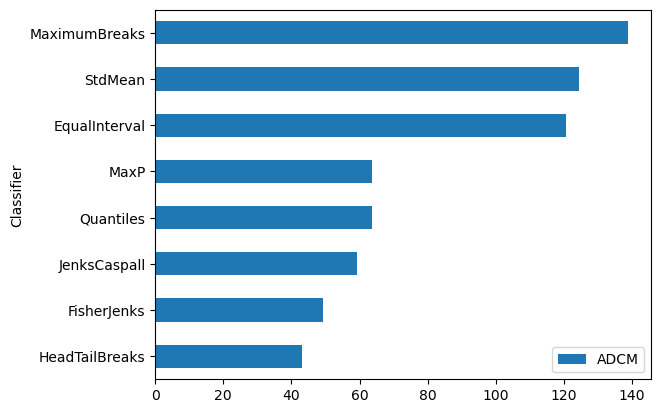

In [12]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [13]:
theMap['Total_mb5'] = mb5.yb

In [26]:
changes={0:"0_Baja", 1:"1_Media", 2:"2_Alta", 3:"3_Muy alta"}
theMap[['Total_mb5_level']]=theMap.loc[:,['Total_mb5']].replace(to_replace=changes)
theMap

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,distrito_propuesto,Total_minMax,Total_mb5,Total_mb5_level
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",0.0,0.000,0,0_Baja
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",1.0,0.625,0,0_Baja
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.14030, -77.72361 -5.140...",0.0,0.000,0,0_Baja
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",2.0,1.250,0,0_Baja
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.90370, -78.13011 -5.904...",1.0,0.625,0,0_Baja
...,...,...,...,...,...,...,...,...,...,...,...
191,24,TUMBES,2403,ZARUMILLA,ZARUMILLA,INEI,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...",0.0,0.000,0,0_Baja
192,25,UCAYALI,2501,CORONEL PORTILLO,PUCALLPA,INEI,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...",0.0,0.000,0,0_Baja
193,25,UCAYALI,2502,ATALAYA,ATALAYA,INEI,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...",2.0,1.250,0,0_Baja
194,25,UCAYALI,2503,PADRE ABAD,AGUAYTIA,INEI,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...",4.0,2.500,0,0_Baja


In [15]:
#theMap.to_excel(os.path.join("data", "theMap.xlsx"))

In [27]:
theMap.to_file(os.path.join("mapas","MapaDistritos.gpkg"), layer='peru', driver="GPKG")

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMap.plot(column='Total_mb5', 
        cmap='Reds', 
        categorical=True,
        edgecolor='grey', 
        linewidth=0.1, 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()